# Import Libraries

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Create DataFrames

In [41]:
rick = pd.read_csv('data/rick_diamonds.csv')
rick.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.91,Very Good,H,SI2,63.4,57.0,6.10,6.18,3.89
1,0.38,Good,F,VS2,60.3,61.0,4.68,4.71,2.83
2,0.52,Ideal,H,VS2,61.8,56.0,5.19,5.16,3.20
3,1.10,Ideal,G,VS1,61.3,56.0,6.65,6.69,4.09
4,2.28,Ideal,G,SI2,61.6,57.0,8.44,8.37,5.18


In [42]:
diamonds = pd.read_csv('data/diamonds.csv')
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
1,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
2,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
3,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
4,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48


In [43]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48940 entries, 0 to 48939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    48940 non-null  float64
 1   cut      48940 non-null  object 
 2   color    48940 non-null  object 
 3   clarity  48940 non-null  object 
 4   depth    48940 non-null  float64
 5   table    48940 non-null  float64
 6   price    48940 non-null  int64  
 7   x        48940 non-null  float64
 8   y        48940 non-null  float64
 9   z        48940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.7+ MB


In [44]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000
mean,0.797817,61.751931,57.451161,3934.409644,5.730712,5.734333,3.538648
std,0.474126,1.430026,2.233450,3989.333861,1.121920,1.145344,0.706817
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.690000,5.710000,3.520000
75%,1.040000,62.500000,59.000000,5331.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [45]:
diamonds.shape

(48940, 10)

# Cleaning the Data

### Transform Categorical into Numeric

In [80]:
diamonds['clarity'].value_counts()
diamonds['color'].unique()
diamonds['cut'].unique()

array(['Premium', 'Good', 'Very Good', 'Ideal', 'Fair'], dtype=object)

In [47]:
clarity_dict = {'I1':0,'SI2':1,'SI1':2,'VS2':3,'VS1':4,'VVS2':5,'VVS1':6,'IF':7}
color_dict = {'J':0,'I':1,'H':2,'G':3,'F':4,'E':5,'D':6}
cut_dict = {'Fair':0,'Good':1,'Very Good':2,'Premium':3,'Ideal':4}

In [48]:
diamonds['n_cut'] = diamonds['cut'].map(cut_dict)
diamonds['n_color'] = diamonds['color'].map(color_dict)
diamonds['n_clarity'] = diamonds['clarity'].map(clarity_dict)

In [49]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,n_cut,n_color,n_clarity
0,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,3,5,2
1,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,1,5,4
2,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,3,1,3
3,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,1,0,1
4,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,2,0,5


In [51]:
diamonds.describe()

,carat,depth,table,price,x,y,z,n_cut,n_color,n_clarity
count,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000
mean,0.797817,61.751931,57.451161,3934.409644,5.730712,5.734333,3.538648,2.906416,3.407254,3.055456
std,0.474126,1.430026,2.233450,3989.333861,1.121920,1.145344,0.706817,1.116568,1.699858,1.645542
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000,2.000000,2.000000,2.000000
50%,0.700000,61.800000,57.000000,2401.000000,5.690000,5.710000,3.520000,3.000000,3.000000,3.000000
75%,1.040000,62.500000,59.000000,5331.250000,6.540000,6.540000,4.040000,4.000000,5.000000,4.000000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000,4.000000,6.000000,7.000000


In [50]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48940 entries, 0 to 48939
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   carat      48940 non-null  float64
 1   cut        48940 non-null  object 
 2   color      48940 non-null  object 
 3   clarity    48940 non-null  object 
 4   depth      48940 non-null  float64
 5   table      48940 non-null  float64
 6   price      48940 non-null  int64  
 7   x          48940 non-null  float64
 8   y          48940 non-null  float64
 9   z          48940 non-null  float64
 10  n_cut      48940 non-null  int64  
 11  n_color    48940 non-null  int64  
 12  n_clarity  48940 non-null  int64  
dtypes: float64(6), int64(4), object(3)
memory usage: 4.9+ MB


## Check variables correlation

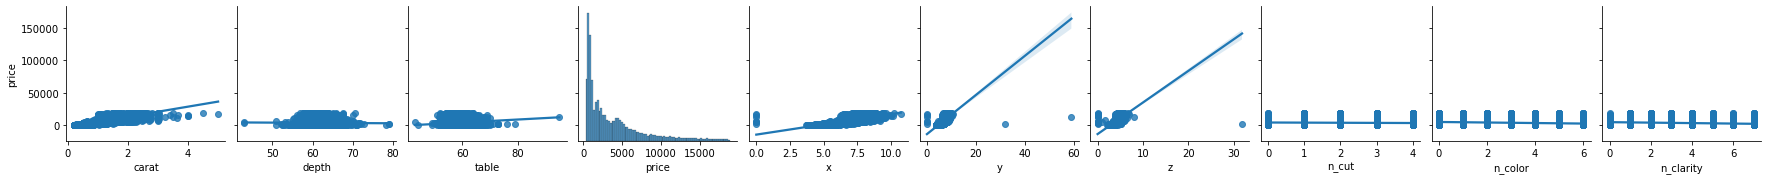

In [56]:
sns.pairplot(data=diamonds, y_vars='price', kind='reg')

In [59]:
diamonds.corr()['price']

carat        0.922186
depth       -0.012037
table        0.127832
price        1.000000
x            0.885019
y            0.864059
z            0.860247
n_cut       -0.055150
n_color     -0.173129
n_clarity   -0.148668
Name: price, dtype: float64

# Create model

### Instanciate LinearRegression object

In [12]:
model = LinearRegression()

### Define X & Y

In [52]:
x = diamonds.drop(['price', 'color', 'cut', 'clarity'], axis=1)
y = diamonds['price']

### Train the model

In [55]:
model.fit(x, y)

LinearRegression()

### Predict

In [60]:
y_pred = model.predict(x)

In [61]:
y_pred

array([ -744.1517119 ,   228.64442031, -1074.62764407, ...,
        3165.2988185 ,  2989.30072922,  3301.27591778])

In [65]:
np.sqrt(mean_squared_error(y, y_pred))

1210.8731792324443

<AxesSubplot:xlabel='carat', ylabel='price'>

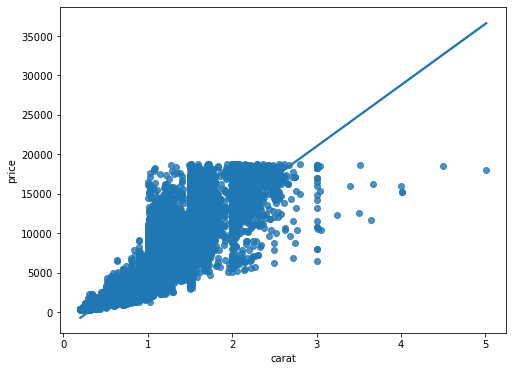

In [75]:
plt.figure(figsize=(8,6))
plt.xlabel('Model')
plt.ylabel('Price')
#plt.scatter(x, y)
sns.regplot(x='carat', y='price',data=diamonds)

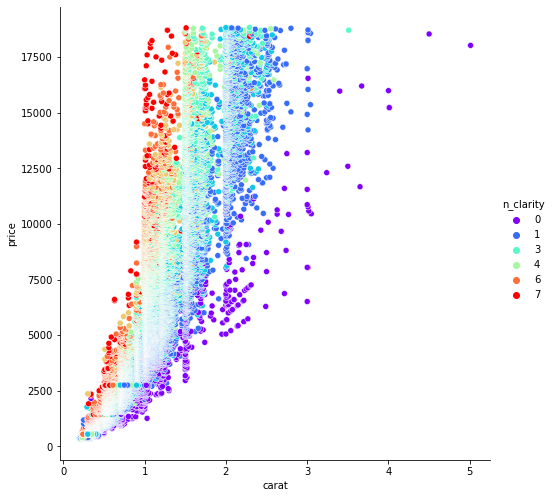

In [76]:
sns.pairplot(diamonds,y_vars='price', x_vars ='carat', hue = 'n_clarity',palette = 'rainbow',height = 7)

<AxesSubplot:xlabel='carat', ylabel='Count'>

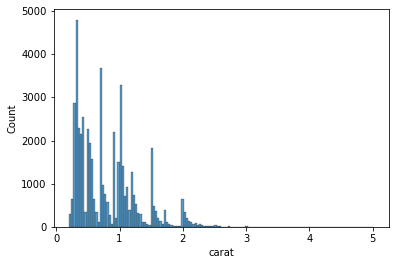

In [72]:
sns.histplot(diamonds['carat'])